In [4]:
import os 
os.chdir("../")

In [15]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class ComparativePlotConfig:
    load_img_low_res: Path
    load_img_original: Path
    load_img_high_res: Path
    save_comp_plot: Path
    title: str


In [16]:
from Image_enhance.constants import *
from Image_enhance.utils.common import read_yaml,  create_directories
from Image_enhance import logger

In [17]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath= CONFIG_FILE_PATH,
        params_filepath= PARAMS_FILE_PATH):
        """
        Initializes ConfigurationManager with provided filepaths.

        Args:
            config_filepath (str): Filepath to configuration file. Defaults to CONFIG_FILE_PATH.
            params_filepath (str): Filepath to parameters file. Defaults to PARAMS_FILE_PATH.
        """
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)

    
    def get_plot_comparision_config(self) -> ComparativePlotConfig:
        """
        Retrieves comparative plot configuration settings.

        Returns:
            plot_comparision_config (ComparativePlotConfig): Comparative plot configuration object.
        """
        # Accessing the comparative plot configuration settings
        config = self.config.comparative_plot
        
        # Creating a comparative plot configuration object
        plot_comparision_config = ComparativePlotConfig(
            load_img_low_res = config.load_img_low_res,
            load_img_original= config.load_img_original,
            load_img_high_res= config.load_img_high_res,
            save_comp_plot= config.save_comp_plot,
            title= config.title
                )

        return plot_comparision_config



In [26]:
import matplotlib.pyplot as plt
from PIL import Image
import time

In [33]:
class PlotComparision():
    """
    Class to generate a comparative plot of three images.

    Args:
        config (ComparativePlotConfig): Configuration object containing image paths and plot settings.

    Attributes:
        config (ComparativePlotConfig): Configuration object containing image paths and plot settings.

    Methods:
        load_image(self, image_path, image_type): Loads an image from the specified path.
        get_plot_img_comparison(self): Generates a comparative plot of the loaded images.
    """
    def __init__(self,config:ComparativePlotConfig):
        """
        Initializes the PlotComparision object with the provided configuration.

        Args:
            config (ComparativePlotConfig): Configuration object containing image paths and plot settings.
        """
        self.config = config

    def load_image(self, image_path, image_type):
        """
        Loads an image from the specified path.

        Args:
            image_path (str): Path to the image file.
            image_type (str): Type of the image (e.g., "Low resolution", "Original", "High resolution").

        Returns:
            Image: The loaded image object if successful, None otherwise.
        """
        try:
            image = Image.open(image_path)
            logger.info(f"{image_type} image loaded from {image_path}")
            return image
        except Exception as e:
            logger.error(f"Error loading {image_type} image from {image_path}: {e}")
            return None
        
    def get_plot_img_comparison(self):

        """
        Generates a comparative plot of the loaded images.

        If any image fails to load, the plot generation is aborted.

        Returns:
            None
        """
        # Load images
        low_res = self.load_image(self.config.load_img_low_res, "Low resolution")
        original = self.load_image(self.config.load_img_original, "Original")
        high_res = self.load_image(self.config.load_img_high_res, "High resolution")

        if None in (low_res, original, high_res):
            logger.error("Failed to load images. Aborting plot generation.")
            return

        # Create subplots
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  
        axes[0].imshow(low_res)
        axes[0].set_title('Low Resolution')

        axes[1].imshow(original)
        axes[1].set_title('Original')

        axes[2].imshow(high_res)
        axes[2].set_title('High Resolution')

        # Hide axes
        for ax in axes:
            ax.axis('off')

        plt.suptitle(self.config.title, fontsize=20)
        plt.savefig(self.config.save_comp_plot)
        logger.info(f"Comparative plot saved in {self.config.save_comp_plot}")
   


[2024-05-12 08:39:40,495: INFO: common: yaml file: config\config.yaml loaded successfully:]
[2024-05-12 08:39:40,497: INFO: common: yaml file: params.yaml loaded successfully:]
[2024-05-12 08:39:40,499: INFO: 4275158649: Low resolution image loaded from artifacts/data_ingestion/monkey_low_res.png:]
[2024-05-12 08:39:40,501: INFO: 4275158649: Original image loaded from artifacts/data_ingestion/monkey.png:]
[2024-05-12 08:39:40,503: INFO: 4275158649: High resolution image loaded from artifacts/data_ingestion/monkey_high_res.png:]
[2024-05-12 08:39:40,842: INFO: 4275158649: Comparative plot saved in artifacts/data_ingestion/comparative_plot.pdf:]


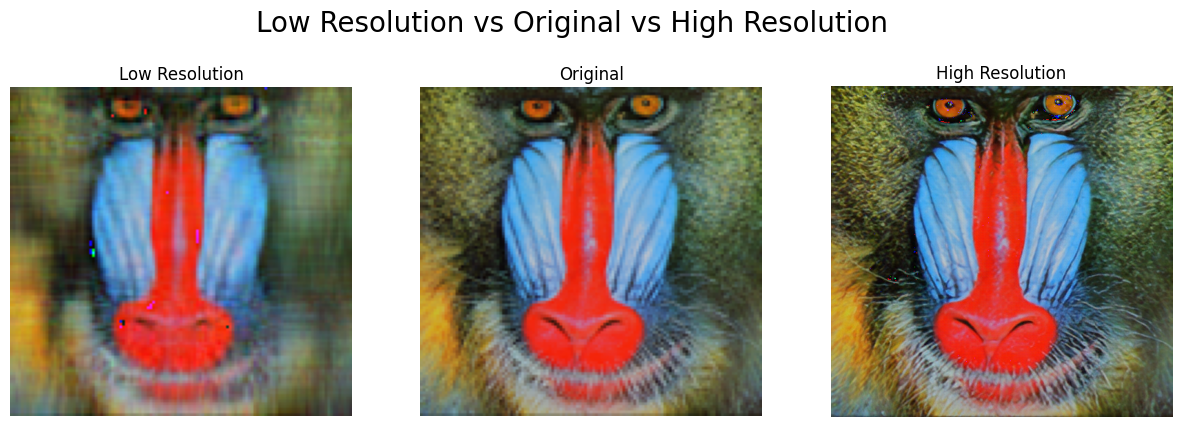

[2024-05-12 08:39:41,141: INFO: 3137110783: Plot comparision latency: 0.6480 seconds:]


In [34]:
start = time.time()
config = ConfigurationManager()
plot_config = config.get_plot_comparision_config()
plot_comp = PlotComparision(plot_config)
plot_comp.get_plot_img_comparison()
logger.info(f"Plot comparision latency: {(time.time() - start):.4f} seconds")
